# Introduction:

This dataset contains rows where each row corresponds to a unqiue user and each column corresponds to a specific ad. If the value is 1, then the user clicked on the ad, if 0, then they did not. The aim is to find which ad is the most effective at getting clicks. This problem is an example of a multi-armed bandit problem. It needs a exploration vs exploitation tradeoff. Exploration meaning trying different new ads to gain new information, while exploitation focuses on ads that the algorithm knows perform well. This notebook will use the Upper Confidence Bound (UCB) reinforcement learning algorithm.

- Reinforcement learning:  machine learning technique that teaches software to make decisions that achieve optimal results by rewarding/punishing decisions according to if they are right or wrong.
- Multi-armed bandit problem: Used in reinforcement learning to simulate decision making uncertainty by utilising k-armed bandits. A agent has to choose between k-different actions and is rewarded accordingly. Demonstrates the important topics of reinforcement learnining, like rewards, timesteps, and values (‘Upper Confidence Bound Algorithm in Reinforcement Learning’, 2020).
- Upper confidence bound: Uses uncertainty in its action-value estimates to balance exploitation and exploration. Explores more at the start to reduce uncertainty, then reduces exploration over time (‘Upper Confidence Bound Algorithm in Reinforcement Learning’, 2020. Rather than just doing a greedy approach by picking the ad with the most 1's in the dataset (greedy because focuses on exploitation), the UCB instead focuses on balancing both exploration and exploitation. Greedy approach can miss out on ads that haven't been explored enough yet.
- This is an optimisation problem
- Uses rewards to adjust its strategy and select the most promising ad for future users based on previous performance

In [8]:
# import libs

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [9]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')


# Dataset:  https://www.kaggle.com/datasets/amisha0528/ads-ctr-optimisation-dataset/data

In [13]:
# Now let us use the Upper confidence bound



# Parameters
N = 10000  # Number of users. Each time one user interacts with one ad
d = 10     # toal number of ads

# Tracking Variables
ads_selected = []                     # List of selected ads for each round
numbers_of_selections = [0] * d       # Count of times each ad is selected. creates list of zeros of length d(10)
sums_of_rewards = [0] * d             # Total rewards for each ad. creates list of zeros of length d(10)
total_reward = 0                      # Total accumulated reward

# UCB Algorithm
for user in range(N):
    selected_ad = 0
    highest_ucb = 0   # tracks the highest UCB so far for CURRENt user

    # Evaluate each ad
    for ad_index in range(d):
        if numbers_of_selections[ad_index] > 0:   # ad has been selected before
            avg_reward = sums_of_rewards[ad_index] / numbers_of_selections[ad_index]
            confidence_bound = math.sqrt(3/2 * math.log(user + 1) / numbers_of_selections[ad_index]) 
            #uncertainty exploration term (encourages exploration)
            ucb = avg_reward + confidence_bound  #highest UCB is best at balancing exploration and exploitation
        else:
            ucb = float('inf')  # Prioritize untested ads at the beginning by giving them inifinite ucb (exploration)

        # Update the selected ad if it has a higher UCB
        if ucb > highest_ucb:
            highest_ucb = ucb
            selected_ad = ad_index

    # Log the selected ad and update tracking
    ads_selected.append(selected_ad)
    numbers_of_selections[selected_ad] += 1
    reward = dataset.values[user, selected_ad]  # reward for selected ad. if ad clicked, reward =1, otherwise 0
    # takes row user, and column selected_ad
    sums_of_rewards[selected_ad] += reward
    total_reward += reward  #total reward for all users

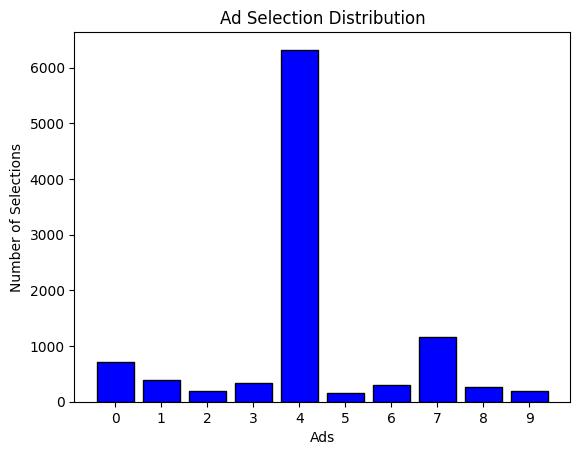

In [14]:
# Visualization of Results
plt.hist(ads_selected, bins=range(d + 1), align='left', rwidth=0.8, color='blue', edgecolor='black')
plt.title('Ad Selection Distribution')
plt.xlabel('Ads')
plt.ylabel('Number of Selections')
plt.xticks(range(d))
plt.show()

# References:

‘Upper Confidence Bound Algorithm in Reinforcement Learning’ (2020) GeeksforGeeks. 8 February 2020 [online]. Available from: https://www.geeksforgeeks.org/upper-confidence-bound-algorithm-in-reinforcement-learning/ [Accessed 31 December 2024].